<a href="https://colab.research.google.com/github/eceakin/PyTorch-DeepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
#convert mnıst image files into a tensor of 4 dimensions (#of images,height,width,color)
transform = transforms.ToTensor()

In [63]:
#train data
train_data = datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform)


In [64]:
#test data
test_data = datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)


In [65]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [66]:
#create small batch size for images
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [67]:
#define cnn model
#describe convolutional layer and what is doing
#2 conv layer
conv1 = nn.Conv2d(1, 6, 3,1)
conv2 = nn.Conv2d(6, 16, 3,1)

In [68]:
#grab 1 mnist record
for i,(X_train,y_train) in enumerate(train_data):
  break

In [69]:
X_train.shape

torch.Size([1, 28, 28])

In [70]:
X = X_train.view(1,1,28,28)

In [71]:
#perform our first conv
X= F.relu(conv1(X))


In [72]:
#1 single image, 6 is the filters we ask for , 26 * 26 image (28 den 26 ya düşme sebebi padding)
X.shape

torch.Size([1, 6, 26, 26])

In [73]:
X = F.max_pool2d(X,2,2) #kerneş pf 2 and stride of 2

In [74]:
X.shape

torch.Size([1, 6, 13, 13])

In [75]:
X=F.relu(conv2(X))

In [76]:
X.shape

torch.Size([1, 16, 11, 11])

In [77]:
#pooling
X=F.max_pool2d(X,2,2)

In [78]:
X.shape

torch.Size([1, 16, 5, 5])

In [81]:
#model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3,1)
    self.conv2 = nn.Conv2d(6, 16, 3,1)

    #fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    #fully connected layer
    X = X.view(-1,5*5*16)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)

In [82]:
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [83]:
#LOSS F OPT
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)  #small lr , longer its take


In [84]:
import time

In [85]:
start_time = time.time()

In [87]:
#create variables to track things

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


#for loop of epochs

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  #train
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1 #start bacthes at 1
    y_pred = model(X_train)  #get prediceted values from training set
    loss = criterion(y_pred,y_train)
    predicted = torch.max(y_pred.data,1)[1] #add the enumber of correct predictions
    batch_corr = (predicted == y_train).sum() #how many we got correct from this batch
    trn_corr += b

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 == 0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  #test
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time=time.time()
total=current_time-start_time
print(f'training took: {total/60}' )


epoch: 0  batch: 600  loss: 0.1623610556125641
epoch: 0  batch: 1200  loss: 0.1502392590045929
epoch: 0  batch: 1800  loss: 0.4744560718536377
epoch: 0  batch: 2400  loss: 0.14238706231117249
epoch: 0  batch: 3000  loss: 0.007758188061416149
epoch: 0  batch: 3600  loss: 0.3836284875869751
epoch: 0  batch: 4200  loss: 0.0038223876617848873
epoch: 0  batch: 4800  loss: 0.0021286322735249996
epoch: 0  batch: 5400  loss: 0.0569545142352581
epoch: 0  batch: 6000  loss: 0.00038789428072050214
epoch: 1  batch: 600  loss: 0.005851339548826218
epoch: 1  batch: 1200  loss: 0.3855525553226471
epoch: 1  batch: 1800  loss: 0.004819948226213455
epoch: 1  batch: 2400  loss: 0.003216963727027178
epoch: 1  batch: 3000  loss: 0.0332382395863533
epoch: 1  batch: 3600  loss: 0.5372857451438904
epoch: 1  batch: 4200  loss: 0.04561494290828705
epoch: 1  batch: 4800  loss: 0.0007510822033509612
epoch: 1  batch: 5400  loss: 0.0001173773780465126
epoch: 1  batch: 6000  loss: 0.14201366901397705
epoch: 2  batch

training took: 11.196146484216055


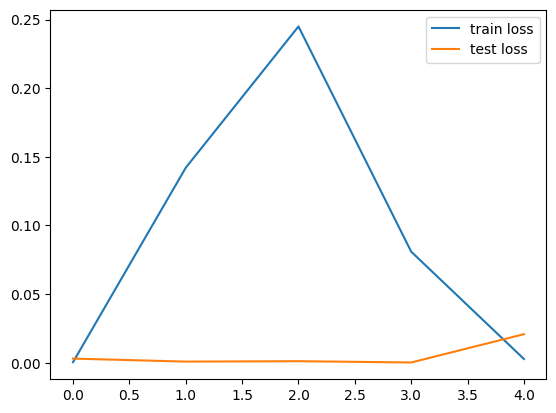

In [90]:
train_losses = [tl.item() for tl in train_losses]
test_losses = [tl.item() for tl in test_losses]
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()

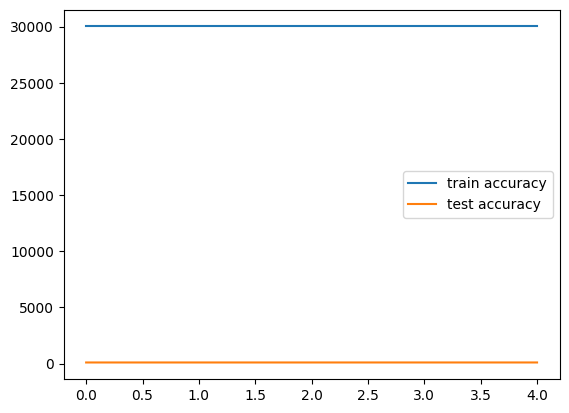

In [91]:
#grapha ccurracy
plt.plot([t/600 for t in train_correct],label='train accuracy')
plt.plot([t/100 for t in test_correct],label='test accuracy')
plt.legend()

In [92]:
test_load_everything = DataLoader(test_data,batch_size=10000,shuffle=False)

In [93]:
with torch.no_grad():
  correct = 0
  for X_test , y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [95]:
correct.item() / len(test_data)

0.9857

In [96]:
#grab an image

In [97]:
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [99]:
#grab data
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

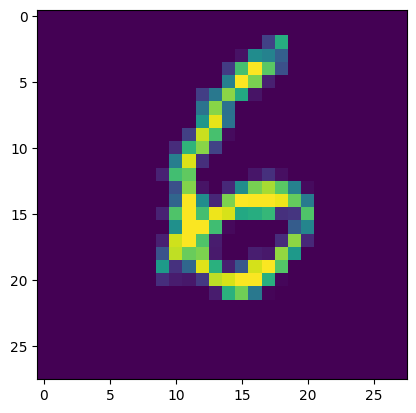

In [110]:
plt.imshow(test_data[2000][0].reshape(28,28))

In [111]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[2000][0].view(1,1,28,28))

In [112]:
new_prediction

tensor([[-1.7098e+01, -1.7927e+01, -2.2424e+01, -1.9848e+01, -2.0097e+01,
         -1.4672e+01, -5.9605e-07, -3.1725e+01, -1.5947e+01, -2.4104e+01]])

In [113]:
new_prediction.argmax()

tensor(6)